In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
n_train, width, height = x_train.shape

In [4]:
n_test, _, _ = x_test.shape

In [5]:
%matplotlib inline
from matplotlib import pyplot

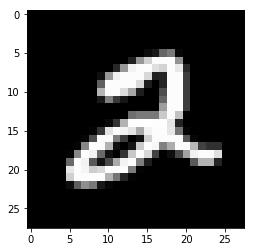

In [6]:
pyplot.imshow(x_train[5,], cmap='gray')

In [7]:
y_train[5,]

2

In [9]:
input_shape = (width, height, 1)  # 흑백 1, 컬러 3

In [10]:
input_train = x_train.reshape(n_train, *input_shape)
input_train.shape

(60000, 28, 28, 1)

In [11]:
input_train.astype('float32')
input_train = input_train / 255.0
input_train.max()

1.0

In [12]:
input_test = x_test.reshape(n_test, *input_shape)
input_test.astype('float32')
input_test = input_test / 255.0

In [13]:
output_train = keras.utils.to_categorical(y_train, 10)

In [14]:
output_test = keras.utils.to_categorical(y_test, 10)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D

In [23]:
model = Sequential()
model.add(Conv2D(32, (4, 4), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (4, 4), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(392, activation='tanh'))
model.add(Dense(10, activation='softmax'))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 32)          16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 392)               201096    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                3930      
Total para

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [26]:
batch_size = 128
epochs = 2

In [27]:
history = model.fit(input_train, output_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(input_test, output_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 107s - loss: 0.1913 - acc: 0.9428 - val_loss: 0.0604 - val_acc: 0.9810
Epoch 2/2
60000/60000 [==============================] - 110s - loss: 0.0551 - acc: 0.9830 - val_loss: 0.0409 - val_acc: 0.9871


In [28]:
history.history

{'acc': [0.94278333333333331, 0.98300000003178911],
 'loss': [0.19128765650987625, 0.055140316100418571],
 'val_acc': [0.98099999999999998, 0.98709999999999998],
 'val_loss': [0.060439271182194353, 0.040880817234516142]}

In [29]:
score = model.evaluate(input_test, output_test, verbose=0)
score

[0.040880816705944019, 0.98709999999999998]